In [16]:
# You can use this code to install packages you need

import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [17]:
# Used imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extra imports used later in code, now separated for readability
from functools import reduce
import gc
import geopandas as gpd
import cbsodata
from owslib.wfs import WebFeatureService

In [18]:
# Download geboortecijfers en verwijder spaties uit regiocodes
data_gezondheidsmonitor = pd.DataFrame(cbsodata.get_data('85012NED'))

In [19]:
# Leeftijd selectie of totaal
data_gezondheidsmonitor[['RegioS', 'Ondergewicht_7',
       'NormaalGewicht_8', 'Overgewicht_9', 'MatigOvergewicht_10',
       'ErnstigOvergewichtObesitas_11']]

,RegioS,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,MatigOvergewicht_10,ErnstigOvergewichtObesitas_11
0,Nederland,1.7,48.8,49.4,34.8,14.7
1,Noord-Nederland (LD),1.6,47.0,51.4,36.0,15.4
2,Oost-Nederland (LD),1.5,47.3,51.2,35.8,15.4
3,West-Nederland (LD),1.9,50.8,47.4,33.6,13.8
4,Zuid-Nederland (LD),1.7,46.9,51.5,35.8,15.7
...,...,...,...,...,...,...
3577,GGD Limburg-Noord (GG),1.1,40.2,60.9,43.5,18.2
3578,GGD Zuid-Limburg (GG),1.3,37.8,62.8,43.3,20.2
3579,GGD Haaglanden (GG),1.9,43.2,57.7,41.1,17.6
3580,GGD Fryslân (GG),1.5,42.3,59.1,43.3,16.7


In [20]:
geodata_url = 'https://service.pdok.nl/cbs/gebiedsindelingen/2017/wfs/v1_0'
wfs = WebFeatureService(geodata_url, version='2.0.0')

# Controleer de beschikbare lagen
print(wfs.contents)

{'gebiedsindelingen:arbeidsmarktregio_gegeneraliseerd': <owslib.feature.wfs200.ContentMetadata object at 0x0000029B53522CD0>, 'gebiedsindelingen:arbeidsmarktregio_labelpoint': <owslib.feature.wfs200.ContentMetadata object at 0x0000029B53522AF0>, 'gebiedsindelingen:arrondissementsgebied_gegeneraliseerd': <owslib.feature.wfs200.ContentMetadata object at 0x0000029B53522F10>, 'gebiedsindelingen:arrondissementsgebied_labelpoint': <owslib.feature.wfs200.ContentMetadata object at 0x0000029B53522DC0>, 'gebiedsindelingen:buurt_gegeneraliseerd': <owslib.feature.wfs200.ContentMetadata object at 0x0000029B53522BE0>, 'gebiedsindelingen:buurt_labelpoint': <owslib.feature.wfs200.ContentMetadata object at 0x0000029B53522A00>, 'gebiedsindelingen:coropgebied_gegeneraliseerd': <owslib.feature.wfs200.ContentMetadata object at 0x0000029B53522820>, 'gebiedsindelingen:coropgebied_labelpoint': <owslib.feature.wfs200.ContentMetadata object at 0x0000029B53522670>, 'gebiedsindelingen:coropplusgebied_gegeneralise

In [21]:
# Kies de gewenste laag
laagnaam = 'gemeente_gegeneraliseerd'

# Haal de gegevens op van de gekozen laag
response = wfs.getfeature(typename=laagnaam, outputFormat='json')
data = response.read().decode('utf-8')

# Converteer de ontvangen gegevens naar een GeoDataFrame
gemeentegrenzen = gpd.read_file(data)

In [22]:
# Koppel CBS-data aan geodata met regiocodes
gemeentegrenzen = pd.merge(gemeentegrenzen, data_gezondheidsmonitor,
                           left_on = "statnaam", 
                           right_on = "RegioS")

In [23]:
gemeentegrenzen.columns

Index(['id', 'statcode', 'statnaam', 'jrstatcode', 'rubriek', 'geometry', 'ID',
       'Leeftijd', 'Marges', 'RegioS', 'ErvarenGezondheidGoedZeerGoed_1',
       'EenOfMeerLangdurigeAandoeningen_2',
       'EenOfMeerLichamelijkeBeperkingen_3', 'BeperkingInHoren_4',
       'BeperkingInZien_5', 'BeperkingInBewegen_6', 'Ondergewicht_7',
       'NormaalGewicht_8', 'Overgewicht_9', 'MatigOvergewicht_10',
       'ErnstigOvergewichtObesitas_11', 'VoldoetAanBeweegrichtlijn_12',
       'WekelijksSporter_13', 'Mantelzorger_14',
       'ZwaarBelasteMantelzorgers_15', 'UrenMantelzorgPerWeek_16', 'Rokers_17',
       'VoldoetAanRichtlijnAlcoholgebruik_18', 'ZwareDrinker_19',
       'OvermatigDrinker_20'],
      dtype='object')

Text(0.5, 1.0, 'Ernstig overgewicht (obesitas) (%)')

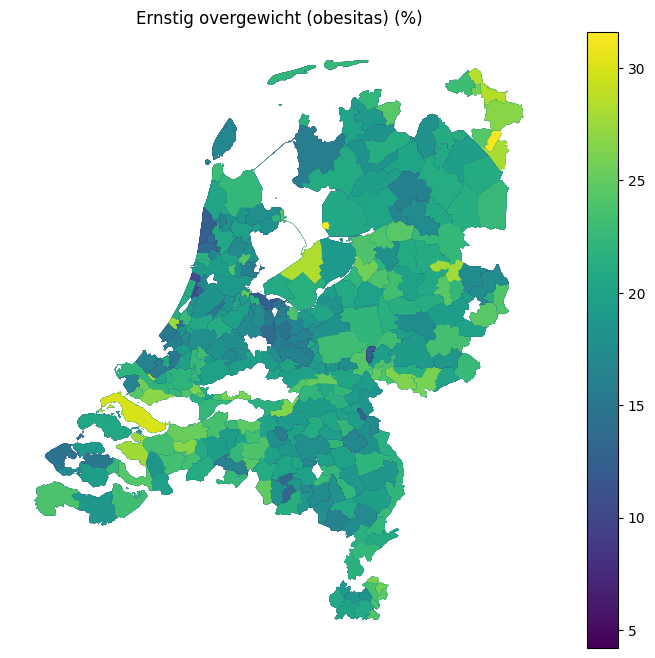

In [24]:
# Maak een thematische kaart
p = gemeentegrenzen.plot(column='ErnstigOvergewichtObesitas_11', 
                         figsize = (10,8), 
                         legend=True)
p.axis('off')
p.set_title('Ernstig overgewicht (obesitas) (%)')

Text(0.5, 1.0, 'MatigOvergewicht_10 (%)')

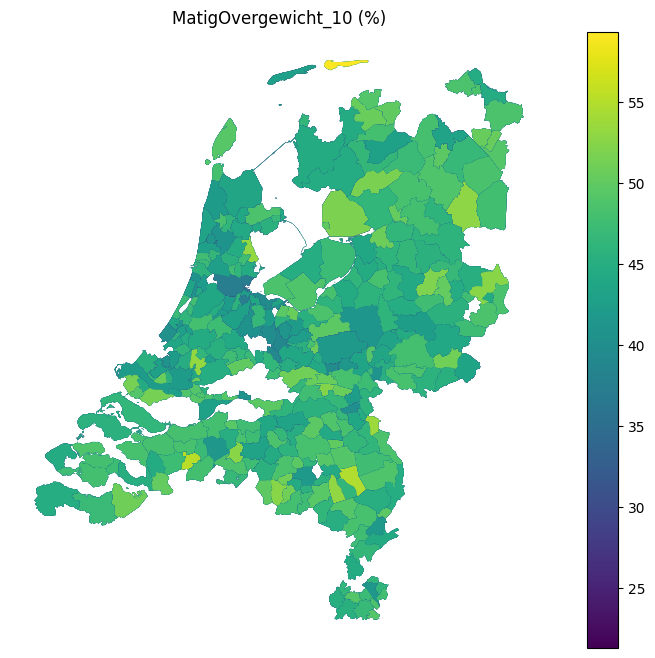

In [25]:
# Maak een thematische kaart
p = gemeentegrenzen.plot(column='MatigOvergewicht_10', 
                         figsize = (10,8), 
                         legend=True)
p.axis('off')
p.set_title('MatigOvergewicht_10 (%)')

Text(0.5, 1.0, 'Overgewicht_9 (%)')

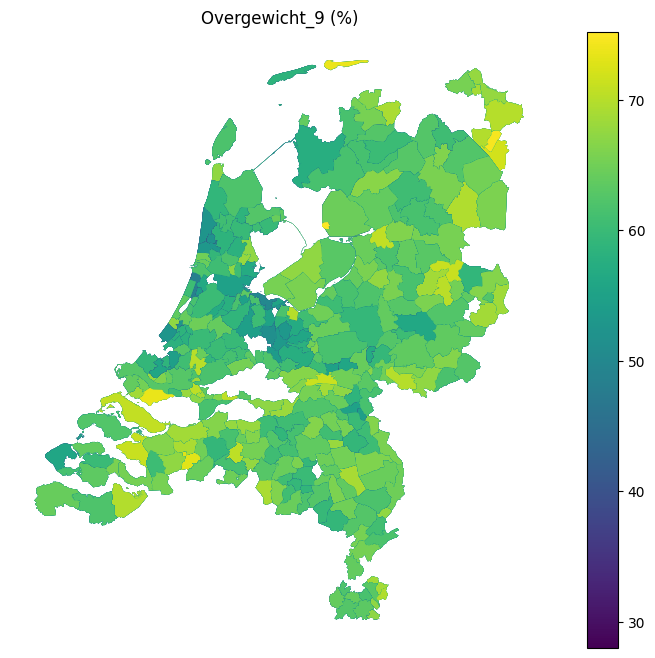

In [26]:
# Maak een thematische kaart
p = gemeentegrenzen.plot(column='Overgewicht_9', 
                         figsize = (10,8), 
                         legend=True)
p.axis('off')
p.set_title('Overgewicht_9 (%)')